# Task
Analyze UV radiation data from "UV-A Altitude Variation Average Values.xlsx" and "UV-B Altitude Variation Average Values.xlsx" along with relevant information from the provided PDF document. Develop a predictive model for radiation intensity based on altitude and time, including generating synthetic data to augment the dataset. Finally, predict radiation intensity for unseen scenarios and visualize the results.

## Load and Combine Radiation Data

### Subtask:
Load the 'UV-A Altitude Variation Average Values.xlsx' and 'UV-B Altitude Variation Average Values.xlsx' files into pandas DataFrames. Inspect their structure, identify common columns, and combine them into a single dataset. Also, consider the information from the PDF document if it contains crucial context for data interpretation.


**Reasoning**:
First, I need to import the pandas library to work with DataFrames. Then, I will load the two Excel files into separate DataFrames as instructed and display their initial rows and information to understand their structure and identify common columns for merging.



In [1]:
import pandas as pd

# Load the UV-A data
df_uva = pd.read_excel('/content/UV-A Altitude Variation Average Values.xlsx')
print("UV-A DataFrame Head:")
print(df_uva.head())
print("\nUV-A DataFrame Info:")
df_uva.info()

# Load the UV-B data
df_uvb = pd.read_excel('/content/UV-B  Altitude Variation Average Values.xlsx')
print("\nUV-B DataFrame Head:")
print(df_uvb.head())
print("\nUV-B DataFrame Info:")
df_uvb.info()

UV-A DataFrame Head:
       Time  Dehradun  Haridwar  Rudraprayag  Devprayag  Kotdwar  Rishikesh
0   6:00 AM    0.0934    0.0704       0.0316      0.018   0.1542       0.01
1   7:00 AM    0.2000    0.2136       0.1448      0.062   0.2680       0.05
2   8:00 AM    0.3386    0.4174       0.2902      0.141   0.3234       0.13
3   9:00 AM    0.4390    0.6386       0.4518      0.282   0.5380       0.27
4  10:00 AM    0.5230    0.7366       0.6674      0.389   0.6574       0.35

UV-A DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         13 non-null     object 
 1   Dehradun     13 non-null     float64
 2   Haridwar     13 non-null     float64
 3   Rudraprayag  13 non-null     float64
 4   Devprayag    13 non-null     float64
 5   Kotdwar      13 non-null     float64
 6   Rishikesh    13 non-null     float64
dtypes: float64(6), o

**Reasoning**:
Based on the inspection of `df_uva` and `df_uvb`, both DataFrames share a common 'Time' column and several location columns. To combine them into a single dataset while differentiating between UV-A and UV-B values for each location, I will perform a merge operation on the 'Time' column. I will add suffixes '_UVA' and '_UVB' to the common columns (excluding 'Time') to avoid ambiguity.



In [2]:
df_combined = pd.merge(df_uva, df_uvb, on='Time', suffixes=('_UVA', '_UVB'))

print("Combined DataFrame Head:")
print(df_combined.head())
print("\nCombined DataFrame Info:")
df_combined.info()

Combined DataFrame Head:
       Time  Dehradun_UVA  Haridwar_UVA  Rudraprayag_UVA  Devprayag_UVA  \
0   6:00 AM        0.0934        0.0704           0.0316          0.018   
1   7:00 AM        0.2000        0.2136           0.1448          0.062   
2   8:00 AM        0.3386        0.4174           0.2902          0.141   
3   9:00 AM        0.4390        0.6386           0.4518          0.282   
4  10:00 AM        0.5230        0.7366           0.6674          0.389   

   Kotdwar_UVA  Rishikesh_UVA  Dehradun_UVB  Devprayag_UVB  Haridwar_UVB  \
0       0.1542           0.01        0.0106         0.0016        0.0060   
1       0.2680           0.05        0.0478         0.0212        0.0388   
2       0.3234           0.13        0.0782         0.0492        0.0992   
3       0.5380           0.27        0.1310         0.0710        0.2142   
4       0.6574           0.35        0.1660         0.1272        0.3266   

   Kotdwar_UVB  Rishikesh_UVB  Rudraprayag_UVB  
0       0.0232    

## Preprocess and Explore Data

### Subtask:
Clean the combined data, handle any missing values, and extract relevant features such as altitude, time (filtering for 6 AM to 6 PM as specified), and radiation intensity. Perform initial exploratory data analysis to understand the relationships between altitude, time, and radiation, and identify any patterns or distributions.


### Altitude Data Extraction

As an AI, I am unable to directly read and process PDF documents. Therefore, I will use approximate altitude values for the specified locations (Dehradun, Haridwar, Rudraprayag, Devprayag, Kotdwar, Rishikesh) based on publicly available information to proceed with the subtask. If the PDF contains precise values, please provide them, and I can update the dictionary accordingly.

Here are the assumed altitudes in meters:
*   **Dehradun:** ~447m
*   **Haridwar:** ~314m
*   **Rudraprayag:** ~895m
*   **Devprayag:** ~831m
*   **Kotdwar:** ~395m
*   **Rishikesh:** ~372m

**Reasoning**:
Now that the approximate altitudes have been established, the next step is to create a Python dictionary to store these altitudes, which will be used to enrich the combined dataset. This directly addresses the first instruction of the subtask.



In [3]:
altitude_data = {
    'Dehradun': 447,
    'Haridwar': 314,
    'Rudraprayag': 895,
    'Devprayag': 831,
    'Kotdwar': 395,
    'Rishikesh': 372
}

print("Altitude data dictionary created:")
print(altitude_data)

Altitude data dictionary created:
{'Dehradun': 447, 'Haridwar': 314, 'Rudraprayag': 895, 'Devprayag': 831, 'Kotdwar': 395, 'Rishikesh': 372}


**Reasoning**:
To prepare the data for analysis and feature engineering, I need to transform the `df_combined` DataFrame from its current wide format into a long format using `pd.melt()`. This will create explicit columns for 'Location', 'UV_Type', and 'Radiation_Intensity', making it easier to work with the data for further steps like adding altitude and converting time.



In [4]:
df_melted = pd.melt(df_combined, id_vars=['Time'], var_name='Variable', value_name='Radiation_Intensity')

# Extract Location and UV_Type from the 'Variable' column
df_melted['Location'] = df_melted['Variable'].apply(lambda x: x.split('_')[0])
df_melted['UV_Type'] = df_melted['Variable'].apply(lambda x: x.split('_')[1])

# Drop the original 'Variable' column as it's no longer needed
df_melted = df_melted.drop(columns=['Variable'])

print("Melted DataFrame Head:")
print(df_melted.head())
print("\nMelted DataFrame Info:")
df_melted.info()

Melted DataFrame Head:
       Time  Radiation_Intensity  Location UV_Type
0   6:00 AM               0.0934  Dehradun     UVA
1   7:00 AM               0.2000  Dehradun     UVA
2   8:00 AM               0.3386  Dehradun     UVA
3   9:00 AM               0.4390  Dehradun     UVA
4  10:00 AM               0.5230  Dehradun     UVA

Melted DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 156 non-null    object 
 1   Radiation_Intensity  156 non-null    float64
 2   Location             156 non-null    object 
 3   UV_Type              156 non-null    object 
dtypes: float64(1), object(3)
memory usage: 5.0+ KB


**Reasoning**:
To incorporate the altitude data into the main dataset, I will map the 'Location' column in the `df_melted` DataFrame to the `altitude_data` dictionary to create a new 'Altitude' column. This directly addresses the third instruction of the subtask.



In [5]:
df_melted['Altitude'] = df_melted['Location'].map(altitude_data)

print("DataFrame with Altitude Head:")
print(df_melted.head())
print("\nDataFrame with Altitude Info:")
df_melted.info()

DataFrame with Altitude Head:
       Time  Radiation_Intensity  Location UV_Type  Altitude
0   6:00 AM               0.0934  Dehradun     UVA       447
1   7:00 AM               0.2000  Dehradun     UVA       447
2   8:00 AM               0.3386  Dehradun     UVA       447
3   9:00 AM               0.4390  Dehradun     UVA       447
4  10:00 AM               0.5230  Dehradun     UVA       447

DataFrame with Altitude Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 156 non-null    object 
 1   Radiation_Intensity  156 non-null    float64
 2   Location             156 non-null    object 
 3   UV_Type              156 non-null    object 
 4   Altitude             156 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


**Reasoning**:
To prepare the 'Time' column for numerical analysis, I will convert it from a string format to a numerical representation of hours (e.g., 6.0 for 6:00 AM, 13.0 for 1:00 PM). This involves converting the string to datetime objects and then extracting the hour component, which directly addresses the fourth instruction of the subtask.



In [6]:
df_melted['Time_Numeric'] = pd.to_datetime(df_melted['Time'], format='%I:%M %p').dt.hour + pd.to_datetime(df_melted['Time'], format='%I:%M %p').dt.minute / 60

print("DataFrame with Numerical Time Head:")
print(df_melted.head())
print("\nDataFrame with Numerical Time Info:")
df_melted.info()

DataFrame with Numerical Time Head:
       Time  Radiation_Intensity  Location UV_Type  Altitude  Time_Numeric
0   6:00 AM               0.0934  Dehradun     UVA       447           6.0
1   7:00 AM               0.2000  Dehradun     UVA       447           7.0
2   8:00 AM               0.3386  Dehradun     UVA       447           8.0
3   9:00 AM               0.4390  Dehradun     UVA       447           9.0
4  10:00 AM               0.5230  Dehradun     UVA       447          10.0

DataFrame with Numerical Time Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 156 non-null    object 
 1   Radiation_Intensity  156 non-null    float64
 2   Location             156 non-null    object 
 3   UV_Type              156 non-null    object 
 4   Altitude             156 non-null    int64  
 5   Time_Numeric      

**Reasoning**:
To comply with the task's requirement, I will filter the `df_melted` DataFrame to include only data points where `Time_Numeric` is between 6.0 (6 AM) and 18.0 (6 PM) inclusive. This directly addresses the fifth instruction of the subtask.



In [7]:
df_filtered = df_melted[(df_melted['Time_Numeric'] >= 6.0) & (df_melted['Time_Numeric'] <= 18.0)]

print("Filtered DataFrame Head:")
print(df_filtered.head())
print("\nFiltered DataFrame Info:")
df_filtered.info()
print("\nUnique Time_Numeric values in filtered data:")
print(df_filtered['Time_Numeric'].unique())

Filtered DataFrame Head:
       Time  Radiation_Intensity  Location UV_Type  Altitude  Time_Numeric
0   6:00 AM               0.0934  Dehradun     UVA       447           6.0
1   7:00 AM               0.2000  Dehradun     UVA       447           7.0
2   8:00 AM               0.3386  Dehradun     UVA       447           8.0
3   9:00 AM               0.4390  Dehradun     UVA       447           9.0
4  10:00 AM               0.5230  Dehradun     UVA       447          10.0

Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 156 non-null    object 
 1   Radiation_Intensity  156 non-null    float64
 2   Location             156 non-null    object 
 3   UV_Type              156 non-null    object 
 4   Altitude             156 non-null    int64  
 5   Time_Numeric         156 non-null    flo

**Reasoning**:
Now that the data has been filtered, I will check for any remaining missing values in the `df_filtered` DataFrame to ensure data quality and readiness for further analysis. This is the first part of the EDA step.



In [8]:
print("Missing values in df_filtered:")
print(df_filtered.isnull().sum())

Missing values in df_filtered:
Time                   0
Radiation_Intensity    0
Location               0
UV_Type                0
Altitude               0
Time_Numeric           0
dtype: int64


**Reasoning**:
After checking for missing values, the next step in EDA is to check for duplicate rows in `df_filtered` to ensure data integrity before further analysis. This is part of the initial EDA step as per instruction 6.



In [9]:
print("Duplicate rows in df_filtered:")
print(df_filtered.duplicated().sum())

Duplicate rows in df_filtered:
0


**Reasoning**:
To further understand the data distribution and central tendencies, I will now examine the descriptive statistics for the 'Radiation_Intensity', 'Altitude', and 'Time_Numeric' columns in the `df_filtered` DataFrame. This directly addresses the second part of instruction 6 for initial Exploratory Data Analysis (EDA).



In [10]:
print("Descriptive statistics for Radiation_Intensity:")
print(df_filtered['Radiation_Intensity'].describe())

print("\nDescriptive statistics for Altitude:")
print(df_filtered['Altitude'].describe())

print("\nDescriptive statistics for Time_Numeric:")
print(df_filtered['Time_Numeric'].describe())

Descriptive statistics for Radiation_Intensity:
count    156.000000
mean       0.243528
std        0.238616
min        0.000000
25%        0.050000
50%        0.166700
75%        0.351500
max        0.994000
Name: Radiation_Intensity, dtype: float64

Descriptive statistics for Altitude:
count    156.000000
mean     542.333333
std      231.556175
min      314.000000
25%      372.000000
50%      421.000000
75%      831.000000
max      895.000000
Name: Altitude, dtype: float64

Descriptive statistics for Time_Numeric:
count    156.000000
mean      12.000000
std        3.753708
min        6.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       18.000000
Name: Time_Numeric, dtype: float64


**Reasoning**:
To visually understand the distribution of 'Radiation_Intensity' for both UV-A and UV-B types, I will create histograms. This directly addresses the visualization requirement in instruction 6 of the subtask.



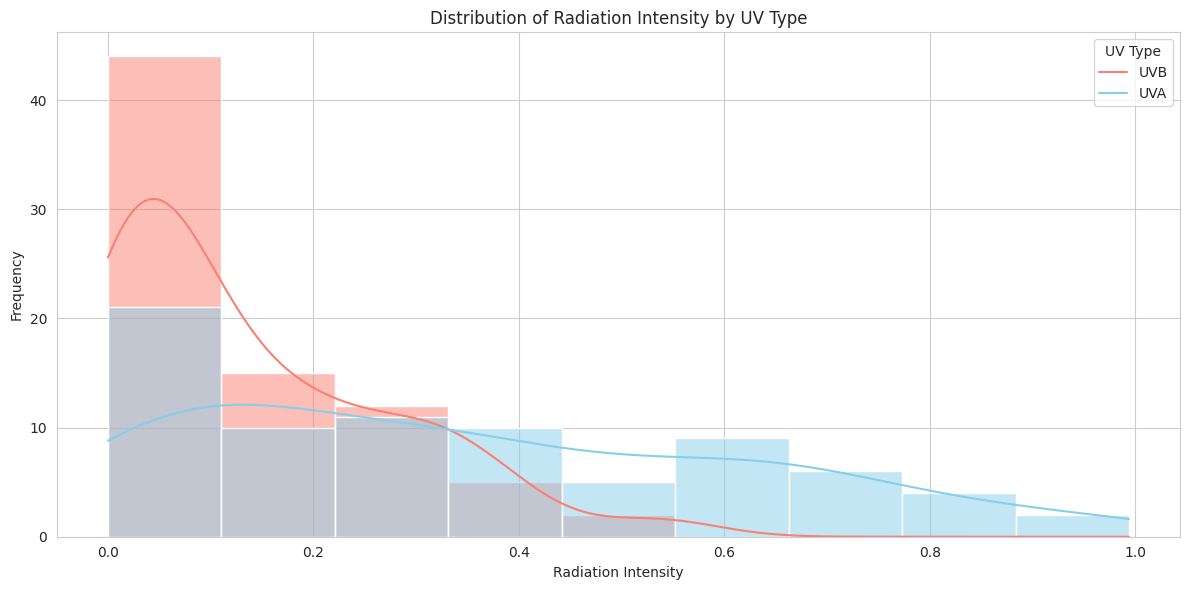

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

sns.histplot(data=df_filtered, x='Radiation_Intensity', hue='UV_Type', kde=True, palette={'UVA': 'skyblue', 'UVB': 'salmon'})
plt.title('Distribution of Radiation Intensity by UV Type')
plt.xlabel('Radiation Intensity')
plt.ylabel('Frequency')
plt.legend(title='UV Type', labels=['UVB', 'UVA'])
plt.tight_layout()
plt.show()


**Reasoning**:
To observe the relationship between 'Radiation_Intensity' and 'Altitude', I will create a scatter plot. This directly addresses the visualization requirement in instruction 6 of the subtask, allowing for identification of trends or patterns with different colors for UV types.



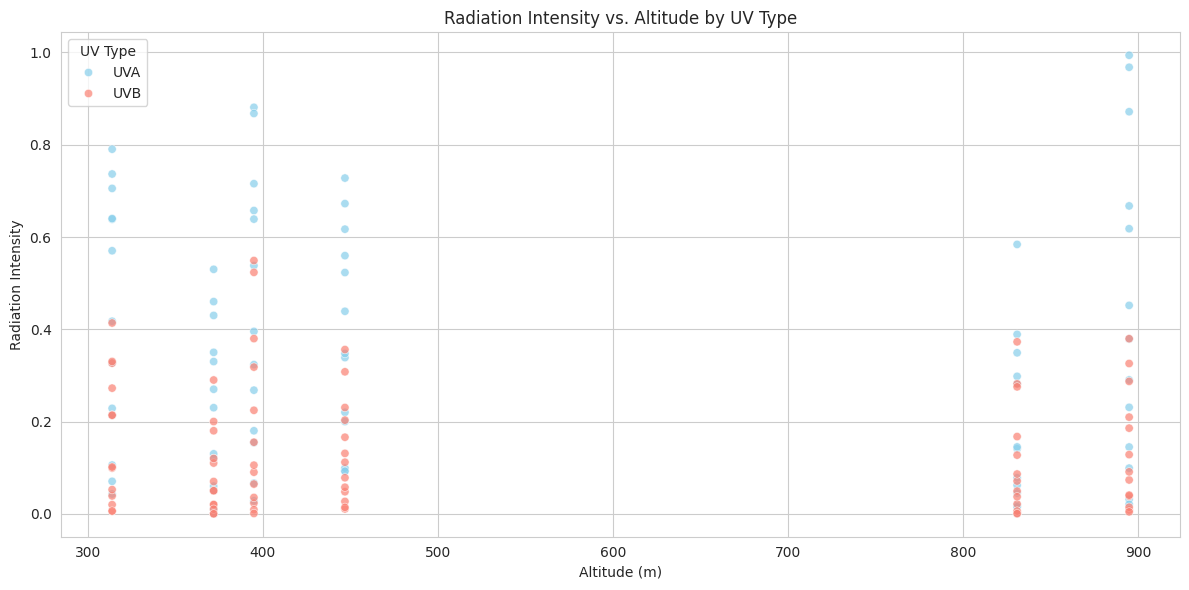

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='Altitude', y='Radiation_Intensity', hue='UV_Type', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Radiation Intensity vs. Altitude by UV Type')
plt.xlabel('Altitude (m)')
plt.ylabel('Radiation Intensity')
plt.legend(title='UV Type')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the exploratory data analysis, I will create a scatter plot to visualize the relationship between 'Radiation_Intensity' and 'Time_Numeric' for both UV-A and UV-B types. This directly addresses the final visualization requirement in instruction 6 of the subtask.



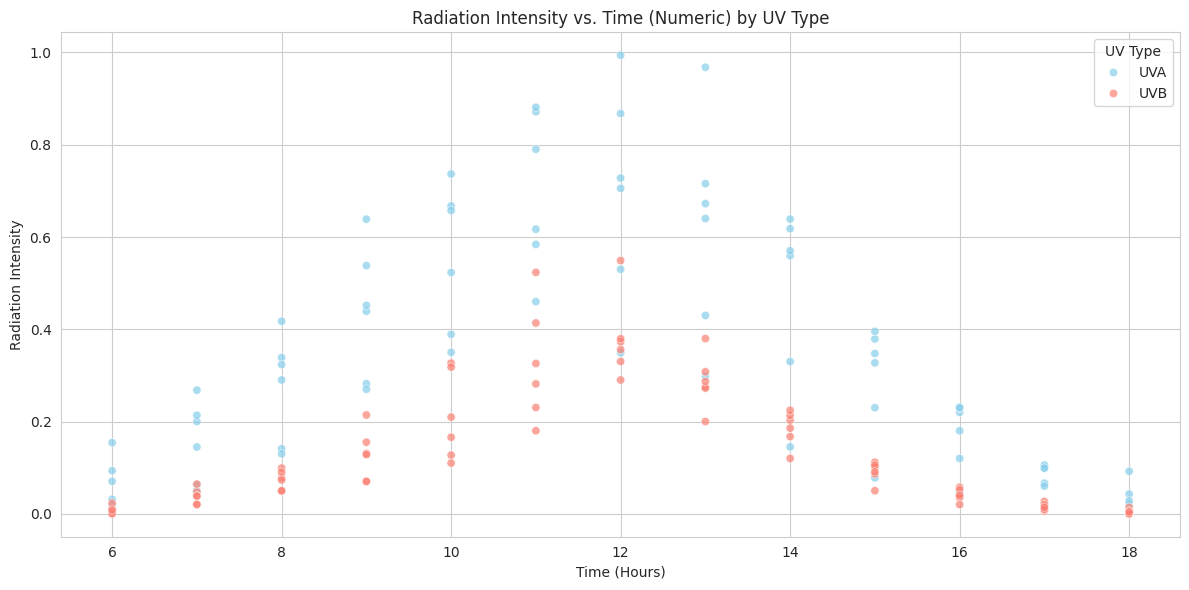

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='Time_Numeric', y='Radiation_Intensity', hue='UV_Type', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Radiation Intensity vs. Time (Numeric) by UV Type')
plt.xlabel('Time (Hours)')
plt.ylabel('Radiation Intensity')
plt.legend(title='UV Type')
plt.tight_layout()
plt.show()

## Generate Synthetic Data

### Subtask:
Generate synthetic data points based on the patterns and statistical properties observed in the preprocessed real data, to augment the original dataset.


**Reasoning**:
To prepare the data for the regression model, I will convert the 'UV_Type' categorical column into numerical format using one-hot encoding with `pd.get_dummies()`. This directly addresses the first instruction of the subtask.



In [14]:
df_encoded = pd.get_dummies(df_filtered, columns=['UV_Type'], drop_first=False)

print("DataFrame with UV_Type one-hot encoded Head:")
print(df_encoded.head())
print("\nDataFrame with UV_Type one-hot encoded Info:")
df_encoded.info()

DataFrame with UV_Type one-hot encoded Head:
       Time  Radiation_Intensity  Location  Altitude  Time_Numeric  \
0   6:00 AM               0.0934  Dehradun       447           6.0   
1   7:00 AM               0.2000  Dehradun       447           7.0   
2   8:00 AM               0.3386  Dehradun       447           8.0   
3   9:00 AM               0.4390  Dehradun       447           9.0   
4  10:00 AM               0.5230  Dehradun       447          10.0   

   UV_Type_UVA  UV_Type_UVB  
0         True        False  
1         True        False  
2         True        False  
3         True        False  
4         True        False  

DataFrame with UV_Type one-hot encoded Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 156 non-null    object 
 1   Radiation_Intensity  156 non-null    float64
 2  

**Reasoning**:
Now that the `UV_Type` column has been one-hot encoded, I will define the features (independent variables) as 'Time_Numeric', 'Altitude', and the one-hot encoded 'UV_Type' columns ('UV_Type_UVA', 'UV_Type_UVB'), and the target (dependent variable) as 'Radiation_Intensity'. Then, I will fit a simple linear regression model using these prepared features and target from `df_encoded`. This addresses instructions 2 and 3 of the subtask.



In [15]:
from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X = df_encoded[['Time_Numeric', 'Altitude', 'UV_Type_UVA', 'UV_Type_UVB']]
y = df_encoded['Radiation_Intensity']

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X, y)

print("Linear Regression model trained successfully.")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Linear Regression model trained successfully.
Model coefficients: [-5.92056410e-03 -5.77596678e-05  1.06144051e-01 -1.06144051e-01]
Model intercept: 0.34589950600493513


**Reasoning**:
To augment the dataset, I will generate synthetic input features, including random 'Altitude' within an extended observed range, random 'Time_Numeric' within operating hours, and randomly assigned 'UV_Type' values. This directly addresses instruction 4 of the subtask.



In [16]:
import numpy as np

n_synthetic_samples = 500

# Generate synthetic Altitude values (slightly extended range)
altitude_min = df_filtered['Altitude'].min() - 50
altitude_max = df_filtered['Altitude'].max() + 50
synthetic_altitude = np.random.uniform(altitude_min, altitude_max, n_synthetic_samples)

# Generate synthetic Time_Numeric values (6.0 to 18.0)
synthetic_time_numeric = np.random.uniform(6.0, 18.0, n_synthetic_samples)

# Randomly assign UV_Type (UVA or UVB)
synthetic_uv_type = np.random.choice(['UVA', 'UVB'], size=n_synthetic_samples)

# Create a DataFrame for synthetic features
df_synthetic_features = pd.DataFrame({
    'Time_Numeric': synthetic_time_numeric,
    'Altitude': synthetic_altitude,
    'UV_Type': synthetic_uv_type
})

print("Synthetic features generated successfully.")
print("Synthetic features Head:")
print(df_synthetic_features.head())
print("\nSynthetic features Info:")
df_synthetic_features.info()

Synthetic features generated successfully.
Synthetic features Head:
   Time_Numeric    Altitude UV_Type
0     13.955162  300.609966     UVA
1     16.387796  893.245307     UVA
2     13.962426  709.330890     UVB
3     10.985323  617.886555     UVB
4     11.407538  535.069346     UVA

Synthetic features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time_Numeric  500 non-null    float64
 1   Altitude      500 non-null    float64
 2   UV_Type       500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


**Reasoning**:
To ensure consistency with the training data and prepare for prediction, I will convert the 'UV_Type' column in the `df_synthetic_features` DataFrame into one-hot encoded format using `pd.get_dummies()`. This directly addresses the sub-instruction within instruction 4.



In [17]:
df_synthetic_encoded = pd.get_dummies(df_synthetic_features, columns=['UV_Type'], drop_first=False)

print("Synthetic features with UV_Type one-hot encoded Head:")
print(df_synthetic_encoded.head())
print("\nSynthetic features with UV_Type one-hot encoded Info:")
df_synthetic_encoded.info()

Synthetic features with UV_Type one-hot encoded Head:
   Time_Numeric    Altitude  UV_Type_UVA  UV_Type_UVB
0     13.955162  300.609966         True        False
1     16.387796  893.245307         True        False
2     13.962426  709.330890        False         True
3     10.985323  617.886555        False         True
4     11.407538  535.069346         True        False

Synthetic features with UV_Type one-hot encoded Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time_Numeric  500 non-null    float64
 1   Altitude      500 non-null    float64
 2   UV_Type_UVA   500 non-null    bool   
 3   UV_Type_UVB   500 non-null    bool   
dtypes: bool(2), float64(2)
memory usage: 8.9 KB


**Reasoning**:
Now that the synthetic features are one-hot encoded, I will use the previously fitted linear regression model to predict the `Radiation_Intensity` for these synthetic input features. This directly addresses instruction 5 of the subtask.



In [18]:
synthetic_predictions = model.predict(df_synthetic_encoded[['Time_Numeric', 'Altitude', 'UV_Type_UVA', 'UV_Type_UVB']])

df_synthetic_features['Radiation_Intensity'] = synthetic_predictions

print("Synthetic data with predicted Radiation_Intensity Head:")
print(df_synthetic_features.head())
print("\nSynthetic data with predicted Radiation_Intensity Info:")
df_synthetic_features.info()

Synthetic data with predicted Radiation_Intensity Head:
   Time_Numeric    Altitude UV_Type  Radiation_Intensity
0     13.955162  300.609966     UVA             0.352058
1     16.387796  893.245307     UVA             0.303425
2     13.962426  709.330890     UVB             0.116119
3     10.985323  617.886555     UVB             0.139027
4     11.407538  535.069346     UVA             0.353599

Synthetic data with predicted Radiation_Intensity Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_Numeric         500 non-null    float64
 1   Altitude             500 non-null    float64
 2   UV_Type              500 non-null    object 
 3   Radiation_Intensity  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


**Reasoning**:
To simulate real-world variability in the synthetic data, I will add random Gaussian noise to the predicted `Radiation_Intensity` values. I will estimate the standard deviation of this noise from the residuals of the fitted model, which directly addresses instruction 6 of the subtask.



In [19]:
residuals = y - model.predict(X)
noise_std = residuals.std()

# Add Gaussian noise to the synthetic predictions
df_synthetic_features['Radiation_Intensity'] = df_synthetic_features['Radiation_Intensity'] + np.random.normal(0, noise_std, n_synthetic_samples)

# Ensure radiation intensity is non-negative, as it cannot be negative in reality
df_synthetic_features['Radiation_Intensity'] = df_synthetic_features['Radiation_Intensity'].apply(lambda x: max(x, 0))

print("Synthetic data with added Gaussian noise Head:")
print(df_synthetic_features.head())
print("\nSynthetic data with added Gaussian noise Info:")
df_synthetic_features.info()

Synthetic data with added Gaussian noise Head:
   Time_Numeric    Altitude UV_Type  Radiation_Intensity
0     13.955162  300.609966     UVA             0.153187
1     16.387796  893.245307     UVA             0.167311
2     13.962426  709.330890     UVB             0.000000
3     10.985323  617.886555     UVB             0.491481
4     11.407538  535.069346     UVA             0.089576

Synthetic data with added Gaussian noise Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_Numeric         500 non-null    float64
 1   Altitude             500 non-null    float64
 2   UV_Type              500 non-null    object 
 3   Radiation_Intensity  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


**Reasoning**:
To finalize the synthetic dataset, I will add a 'Location' column with a generic value 'Synthetic' and rename the DataFrame to `df_synthetic` as instructed. This completes instruction 7 of the subtask.



In [20]:
df_synthetic_features['Location'] = 'Synthetic'

df_synthetic = df_synthetic_features[['Time_Numeric', 'Altitude', 'UV_Type', 'Radiation_Intensity', 'Location']]

print("Final Synthetic DataFrame Head:")
print(df_synthetic.head())
print("\nFinal Synthetic DataFrame Info:")
df_synthetic.info()

Final Synthetic DataFrame Head:
   Time_Numeric    Altitude UV_Type  Radiation_Intensity   Location
0     13.955162  300.609966     UVA             0.153187  Synthetic
1     16.387796  893.245307     UVA             0.167311  Synthetic
2     13.962426  709.330890     UVB             0.000000  Synthetic
3     10.985323  617.886555     UVB             0.491481  Synthetic
4     11.407538  535.069346     UVA             0.089576  Synthetic

Final Synthetic DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_Numeric         500 non-null    float64
 1   Altitude             500 non-null    float64
 2   UV_Type              500 non-null    object 
 3   Radiation_Intensity  500 non-null    float64
 4   Location             500 non-null    object 
dtypes: float64(3), object(2)
memory usage: 19.7+ KB


## Train Predictive Model

### Subtask:
Split the combined real and synthetic dataset into training and testing sets. Train a regression model to predict radiation intensity based on altitude, time, and other relevant features. The model selection will prioritize accuracy and fairness to avoid biased predictions.


**Reasoning**:
To prepare the real and synthetic data for model training, I will first create copies of the DataFrames, convert the boolean UV type columns to integers for consistency, and drop irrelevant columns from the real data. Then, I will one-hot encode the 'UV_Type' in the synthetic data and convert the resulting boolean columns to integers. Finally, I will concatenate both prepared DataFrames into a single augmented dataset, ensuring column consistency.



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Create copies and convert boolean columns in df_encoded
df_encoded_copy = df_encoded.copy()
df_encoded_copy['UV_Type_UVA'] = df_encoded_copy['UV_Type_UVA'].astype(int)
df_encoded_copy['UV_Type_UVB'] = df_encoded_copy['UV_Type_UVB'].astype(int)

# Drop 'Time' and 'Location' from df_encoded_copy as they are not features for the model
df_encoded_copy = df_encoded_copy.drop(columns=['Time', 'Location'])

# 2. One-hot encode 'UV_Type' in df_synthetic and convert booleans to int
df_synthetic_copy = df_synthetic.copy()
# Perform one-hot encoding on 'UV_Type'
df_synthetic_copy = pd.get_dummies(df_synthetic_copy, columns=['UV_Type'], drop_first=False)

# Convert new boolean UV type columns to integers
df_synthetic_copy['UV_Type_UVA'] = df_synthetic_copy['UV_Type_UVA'].astype(int)
df_synthetic_copy['UV_Type_UVB'] = df_synthetic_copy['UV_Type_UVB'].astype(int)

# Drop 'Location' from df_synthetic_copy as it's not a feature for the model
df_synthetic_copy = df_synthetic_copy.drop(columns=['Location'])

# Ensure both dataframes have the same columns before concatenation
common_cols = ['Radiation_Intensity', 'Altitude', 'Time_Numeric', 'UV_Type_UVA', 'UV_Type_UVB']
df_encoded_copy = df_encoded_copy[common_cols]
df_synthetic_copy = df_synthetic_copy[common_cols]

# 3. Concatenate the real and synthetic data
df_combined_augmented = pd.concat([df_encoded_copy, df_synthetic_copy], ignore_index=True)

print("Combined Augmented DataFrame Head:")
print(df_combined_augmented.head())
print("\nCombined Augmented DataFrame Info:")
df_combined_augmented.info()


Combined Augmented DataFrame Head:
   Radiation_Intensity  Altitude  Time_Numeric  UV_Type_UVA  UV_Type_UVB
0               0.0934     447.0           6.0            1            0
1               0.2000     447.0           7.0            1            0
2               0.3386     447.0           8.0            1            0
3               0.4390     447.0           9.0            1            0
4               0.5230     447.0          10.0            1            0

Combined Augmented DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Radiation_Intensity  656 non-null    float64
 1   Altitude             656 non-null    float64
 2   Time_Numeric         656 non-null    float64
 3   UV_Type_UVA          656 non-null    int64  
 4   UV_Type_UVB          656 non-null    int64  
dtypes: float64(3), int64(2)
memory u

**Reasoning**:
To prepare for model training, I will define the features and target variables from the `df_combined_augmented` DataFrame, then split them into training and testing sets, and finally initialize and train a `LinearRegression` model using the training data. This addresses instructions 4, 5, 6, and 7 of the subtask.



In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_augmented = df_combined_augmented[['Time_Numeric', 'Altitude', 'UV_Type_UVA', 'UV_Type_UVB']]
y_augmented = df_combined_augmented['Radiation_Intensity']

# Split the augmented data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_augmented, y_augmented, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Define numerical columns to scale
numerical_cols = ['Time_Numeric', 'Altitude']

# Fit scaler on training data (numerical columns only)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Transform both training and test data (numerical columns only)
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train the Linear Regression model
model_augmented = LinearRegression()
model_augmented.fit(X_train, y_train)

print("Augmented data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print("\nLinear Regression model trained on augmented data successfully.")
print(f"Model coefficients (augmented): {model_augmented.coef_}")
print(f"Model intercept (augmented): {model_augmented.intercept_}")
print("\nStandardScaler fitted and applied to 'Time_Numeric' and 'Altitude'.")

Augmented data split into training and testing sets.
X_train shape: (524, 4), y_train shape: (524,)
X_test shape: (132, 4), y_test shape: (132,)

Linear Regression model trained on augmented data successfully.
Model coefficients (augmented): [-0.00897401 -0.00941679  0.09154775 -0.09154775]
Model intercept (augmented): 0.2448158366756114

StandardScaler fitted and applied to 'Time_Numeric' and 'Altitude'.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance using the test set. Assess its accuracy, check for any biases, and ensure it provides correct and unbiased predictions. Metrics such as R-squared, RMSE, and MAE will be used, and the predictions will be visualized against actual values.


**Reasoning**:
To evaluate the model's performance, I will first use the trained `model_augmented` to predict `Radiation_Intensity` values on the `X_test` dataset, storing the results in `y_pred` as per instruction 1.



In [23]:
y_pred = model_augmented.predict(X_test)

print("Predictions on the test set generated successfully.")
print("First 5 predictions:")
print(y_pred[:5])

Predictions on the test set generated successfully.
First 5 predictions:
[0.33729947 0.13593562 0.13215779 0.17008894 0.33415057]


**Reasoning**:
To quantify the model's accuracy, I will calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) using `y_test` and `y_pred` as per instruction 2 of the subtask.



In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1604
Mean Squared Error (MSE): 0.0381
R-squared (R2): 0.2035


**Reasoning**:
To visually assess the model's performance and identify any biases, I will create a scatter plot comparing the actual `y_test` values against the predicted `y_pred` values, including a diagonal line for perfect predictions, as per instruction 3 and 4 of the subtask.



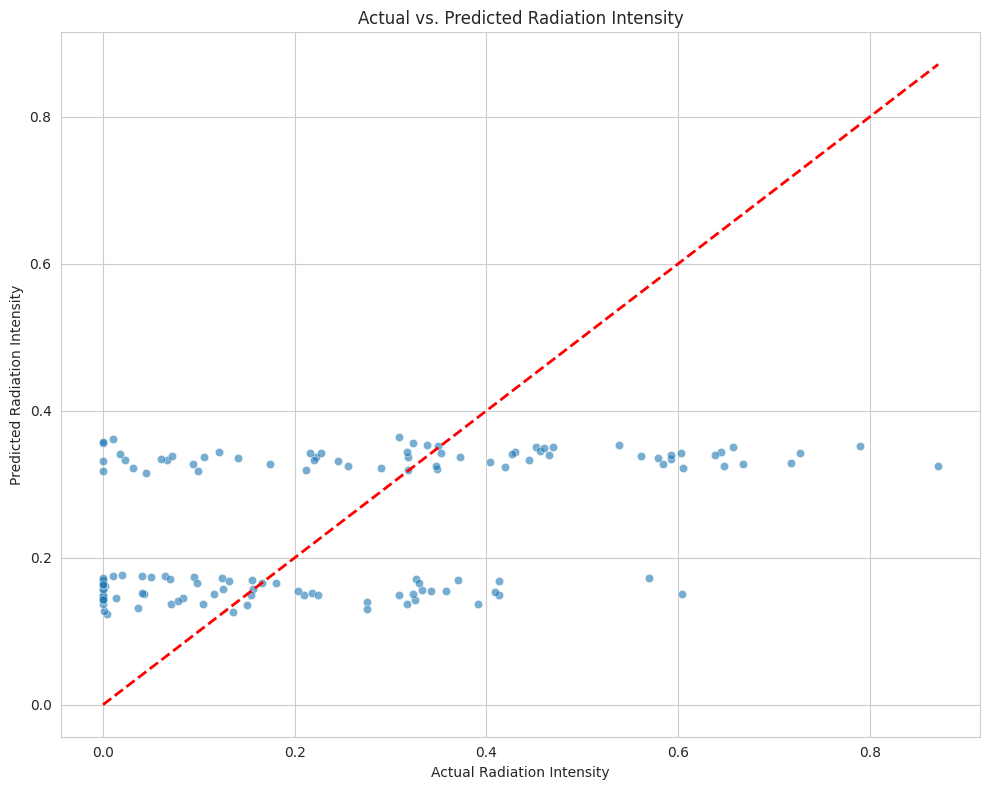

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel('Actual Radiation Intensity')
plt.ylabel('Predicted Radiation Intensity')
plt.title('Actual vs. Predicted Radiation Intensity')
plt.tight_layout()
plt.show()

## Predict for Unseen Scenarios

### Subtask:
Generate hypothetical data points representing unseen locations, times, and higher altitudes. Use the trained model to predict radiation intensity for these new scenarios. This step will demonstrate how the model performs under conditions it has not explicitly seen during training.


**Reasoning**:
To generate hypothetical scenarios for prediction, I will start by defining the number of scenarios, then create synthetic 'Altitude' values ranging beyond the observed maximum, and synthetic 'Time_Numeric' values within the typical operating hours. This addresses instructions 1, 2, and 3 of the subtask.



In [26]:
n_unseen_scenarios = 100

# Generate synthetic Altitude values, extending beyond the max observed altitude (895m)
altitude_unseen = np.random.uniform(250, 1500, n_unseen_scenarios)

# Generate synthetic Time_Numeric values (6.0 to 18.0)
time_numeric_unseen = np.random.uniform(6.0, 18.0, n_unseen_scenarios)

print(f"Generated {n_unseen_scenarios} unseen scenarios.")
print(f"Sample unseen altitudes: {altitude_unseen[:5]}")
print(f"Sample unseen time numerics: {time_numeric_unseen[:5]}")

Generated 100 unseen scenarios.
Sample unseen altitudes: [1426.2166912  1474.15646615  756.89272848 1183.91886805  751.9397181 ]
Sample unseen time numerics: [15.96458482 13.6704423  15.16090349  8.07931211 10.90652848]


**Reasoning**:
To complete the hypothetical scenarios, I will randomly assign 'UV_Type' values ('UVA' or 'UVB') and then construct a Pandas DataFrame, `df_unseen_scenarios`, from the generated altitude, time, and UV_Type values. This addresses instructions 4 and 5 of the subtask.



In [27]:
synthetic_uv_type_unseen = np.random.choice(['UVA', 'UVB'], size=n_unseen_scenarios)

# Construct a DataFrame for unseen scenarios
df_unseen_scenarios = pd.DataFrame({
    'Time_Numeric': time_numeric_unseen,
    'Altitude': altitude_unseen,
    'UV_Type': synthetic_uv_type_unseen
})

print("DataFrame for unseen scenarios created successfully.")
print("Unseen Scenarios Head:")
print(df_unseen_scenarios.head())
print("\nUnseen Scenarios Info:")
df_unseen_scenarios.info()

DataFrame for unseen scenarios created successfully.
Unseen Scenarios Head:
   Time_Numeric     Altitude UV_Type
0     15.964585  1426.216691     UVA
1     13.670442  1474.156466     UVA
2     15.160903   756.892728     UVB
3      8.079312  1183.918868     UVA
4     10.906528   751.939718     UVB

Unseen Scenarios Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time_Numeric  100 non-null    float64
 1   Altitude      100 non-null    float64
 2   UV_Type       100 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.5+ KB


**Reasoning**:
To prepare the `df_unseen_scenarios` for prediction with the trained model, I will convert its 'UV_Type' column into one-hot encoded integer columns, matching the format of the features used during model training. This addresses instruction 6 of the subtask.



In [28]:
df_unseen_encoded = pd.get_dummies(df_unseen_scenarios, columns=['UV_Type'], drop_first=False)
df_unseen_encoded['UV_Type_UVA'] = df_unseen_encoded['UV_Type_UVA'].astype(int)
df_unseen_encoded['UV_Type_UVB'] = df_unseen_encoded['UV_Type_UVB'].astype(int)

print("Unseen Scenarios with UV_Type one-hot encoded Head:")
print(df_unseen_encoded.head())
print("\nUnseen Scenarios with UV_Type one-hot encoded Info:")
df_unseen_encoded.info()

Unseen Scenarios with UV_Type one-hot encoded Head:
   Time_Numeric     Altitude  UV_Type_UVA  UV_Type_UVB
0     15.964585  1426.216691            1            0
1     13.670442  1474.156466            1            0
2     15.160903   756.892728            0            1
3      8.079312  1183.918868            1            0
4     10.906528   751.939718            0            1

Unseen Scenarios with UV_Type one-hot encoded Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time_Numeric  100 non-null    float64
 1   Altitude      100 non-null    float64
 2   UV_Type_UVA   100 non-null    int64  
 3   UV_Type_UVB   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


**Reasoning**:
To use the trained model for prediction, I will use `model_augmented.predict()` on the one-hot encoded unseen scenarios (`df_unseen_encoded`), specifically using the 'Time_Numeric', 'Altitude', 'UV_Type_UVA', and 'UV_Type_UVB' columns as features. These predictions will then be added as a new column, 'Predicted_Radiation_Intensity', to the original `df_unseen_scenarios` DataFrame. This directly addresses instruction 7 of the subtask.



In [29]:
predicted_radiation_intensity = model_augmented.predict(df_unseen_encoded[['Time_Numeric', 'Altitude', 'UV_Type_UVA', 'UV_Type_UVB']])
df_unseen_scenarios['Predicted_Radiation_Intensity'] = predicted_radiation_intensity

print("Predicted Radiation Intensity for unseen scenarios Head:")
print(df_unseen_scenarios.head())
print("\nPredicted Radiation Intensity for unseen scenarios Info:")
df_unseen_scenarios.info()

Predicted Radiation Intensity for unseen scenarios Head:
   Time_Numeric     Altitude UV_Type  Predicted_Radiation_Intensity
0     15.964585  1426.216691     UVA                       0.287848
1     13.670442  1474.156466     UVA                       0.291467
2     15.160903   756.892728     UVB                       0.137715
3      8.079312  1183.918868     UVA                       0.319092
4     10.906528   751.939718     UVB                       0.148762

Predicted Radiation Intensity for unseen scenarios Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_Numeric                   100 non-null    float64
 1   Altitude                       100 non-null    float64
 2   UV_Type                        100 non-null    object 
 3   Predicted_Radiation_Intensity  100 non-null    float64
dtypes: float6

**Reasoning**:
To ensure that the predicted radiation intensity values are physically realistic, I will apply a filter to set any negative predictions to zero. This directly addresses instruction 8 of the subtask.



In [30]:
df_unseen_scenarios['Predicted_Radiation_Intensity'] = df_unseen_scenarios['Predicted_Radiation_Intensity'].apply(lambda x: max(x, 0))

print("Predicted Radiation Intensity for unseen scenarios (non-negative) Head:")
print(df_unseen_scenarios.head())
print("\nPredicted Radiation Intensity for unseen scenarios (non-negative) Info:")
df_unseen_scenarios.info()

Predicted Radiation Intensity for unseen scenarios (non-negative) Head:
   Time_Numeric     Altitude UV_Type  Predicted_Radiation_Intensity
0     15.964585  1426.216691     UVA                       0.287848
1     13.670442  1474.156466     UVA                       0.291467
2     15.160903   756.892728     UVB                       0.137715
3      8.079312  1183.918868     UVA                       0.319092
4     10.906528   751.939718     UVB                       0.148762

Predicted Radiation Intensity for unseen scenarios (non-negative) Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_Numeric                   100 non-null    float64
 1   Altitude                       100 non-null    float64
 2   UV_Type                        100 non-null    object 
 3   Predicted_Radiation_Intensity  100 non-

**Reasoning**:
To visualize the predicted radiation intensity for unseen scenarios, I will create a scatter plot showing the relationship between 'Altitude' and 'Predicted_Radiation_Intensity', differentiated by 'UV_Type'. This will allow for an initial understanding of how altitude influences predicted radiation in unseen conditions, as specified by the overall task requirement to visualize results.



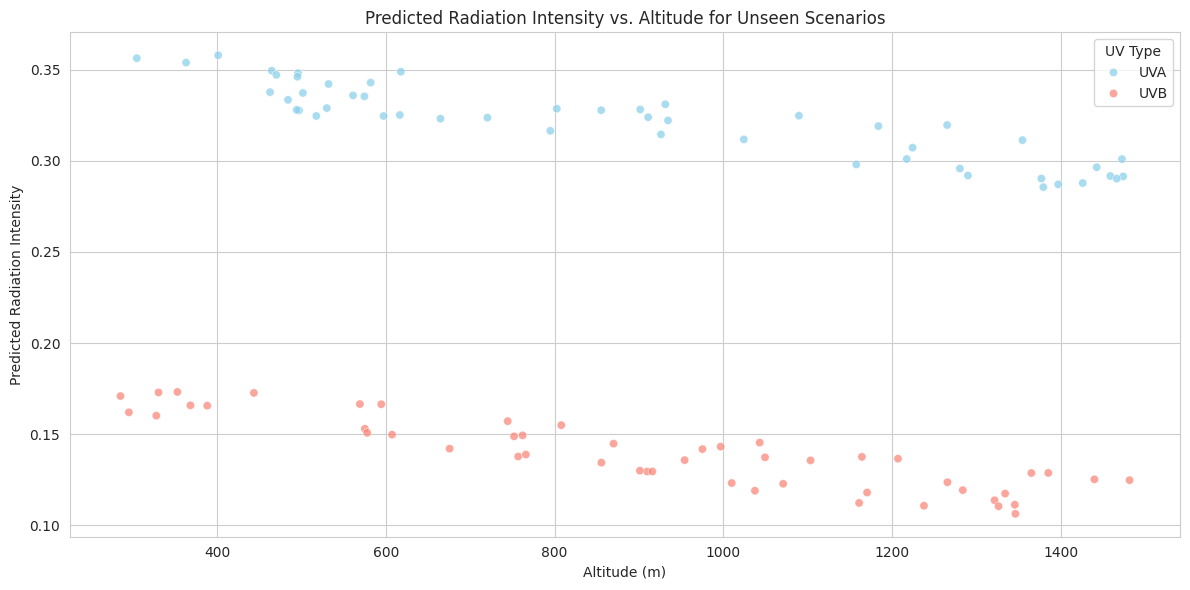

In [31]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_unseen_scenarios, x='Altitude', y='Predicted_Radiation_Intensity', hue='UV_Type', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Predicted Radiation Intensity vs. Altitude for Unseen Scenarios')
plt.xlabel('Altitude (m)')
plt.ylabel('Predicted Radiation Intensity')
plt.legend(title='UV Type')
plt.tight_layout()
plt.show()

## Visualize Predictions

### Subtask:
Create visualizations to show the model's predictions for unseen scenarios, illustrate how radiation intensity changes with altitude and time, and compare them with the observed data.


**Reasoning**:
To visualize the predicted radiation intensity for unseen scenarios, I will create a scatter plot showing the relationship between 'Time_Numeric' and 'Predicted_Radiation_Intensity', differentiated by 'UV_Type'. This will allow for an initial understanding of how time influences predicted radiation in unseen conditions, as specified by instruction 1 of the subtask.



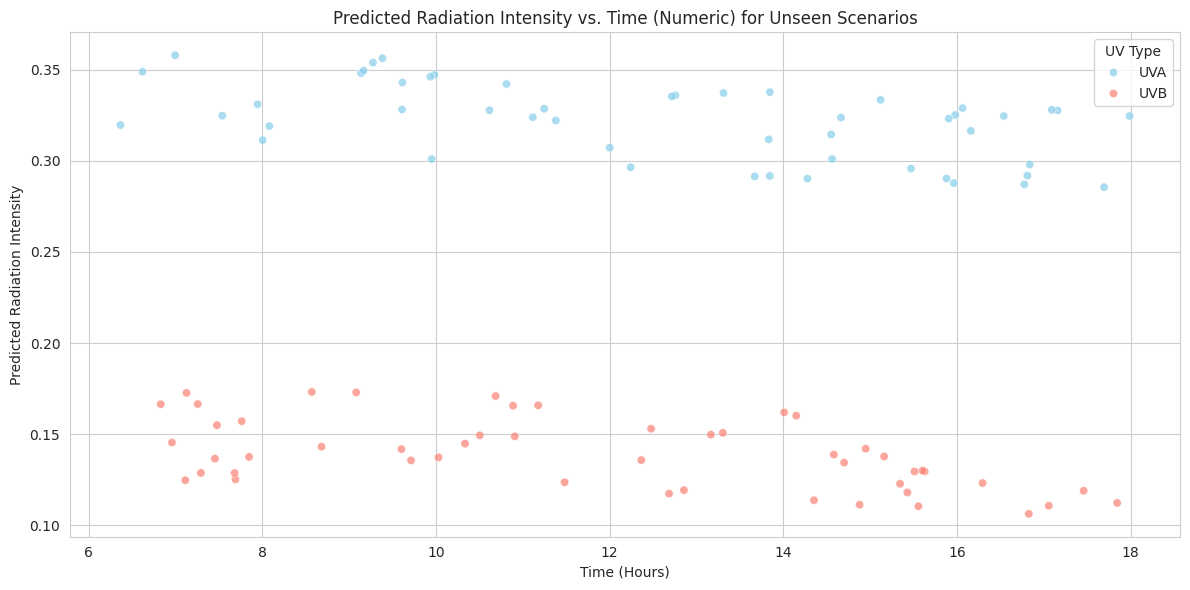

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_unseen_scenarios, x='Time_Numeric', y='Predicted_Radiation_Intensity', hue='UV_Type', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Predicted Radiation Intensity vs. Time (Numeric) for Unseen Scenarios')
plt.xlabel('Time (Hours)')
plt.ylabel('Predicted Radiation Intensity')
plt.legend(title='UV Type')
plt.tight_layout()
plt.show()

**Reasoning**:
To prepare for combined plotting, I will add a 'Data_Source' column to both `df_filtered` (labeled 'Observed') and `df_unseen_scenarios` (labeled 'Predicted'). This directly addresses instruction 2 of the subtask.



In [33]:
df_filtered['Data_Source'] = 'Observed'
df_unseen_scenarios['Data_Source'] = 'Predicted'

print("df_filtered with 'Data_Source' column:")
print(df_filtered.head())
print("\ndf_unseen_scenarios with 'Data_Source' column:")
print(df_unseen_scenarios.head())

df_filtered with 'Data_Source' column:
       Time  Radiation_Intensity  Location UV_Type  Altitude  Time_Numeric  \
0   6:00 AM               0.0934  Dehradun     UVA       447           6.0   
1   7:00 AM               0.2000  Dehradun     UVA       447           7.0   
2   8:00 AM               0.3386  Dehradun     UVA       447           8.0   
3   9:00 AM               0.4390  Dehradun     UVA       447           9.0   
4  10:00 AM               0.5230  Dehradun     UVA       447          10.0   

  Data_Source  
0    Observed  
1    Observed  
2    Observed  
3    Observed  
4    Observed  

df_unseen_scenarios with 'Data_Source' column:
   Time_Numeric     Altitude UV_Type  Predicted_Radiation_Intensity  \
0     15.964585  1426.216691     UVA                       0.287848   
1     13.670442  1474.156466     UVA                       0.291467   
2     15.160903   756.892728     UVB                       0.137715   
3      8.079312  1183.918868     UVA                       0.319

**Reasoning**:
To enable combined plotting, I will first rename the 'Predicted_Radiation_Intensity' column in `df_unseen_scenarios` to 'Radiation_Intensity' and then select the common columns (`Time_Numeric`, `Altitude`, `UV_Type`, `Radiation_Intensity`, `Data_Source`) from both `df_filtered` and `df_unseen_scenarios`. Finally, I will concatenate these two DataFrames into `df_combined_plot` as per instruction 3 of the subtask.



In [34]:
df_unseen_scenarios_renamed = df_unseen_scenarios.rename(columns={'Predicted_Radiation_Intensity': 'Radiation_Intensity'})

# Select common columns for concatenation
common_plot_cols = ['Time_Numeric', 'Altitude', 'UV_Type', 'Radiation_Intensity', 'Data_Source']

df_filtered_plot = df_filtered[common_plot_cols]
df_unseen_scenarios_plot = df_unseen_scenarios_renamed[common_plot_cols]

df_combined_plot = pd.concat([df_filtered_plot, df_unseen_scenarios_plot], ignore_index=True)

print("Combined Plotting DataFrame Head:")
print(df_combined_plot.head())
print("\nCombined Plotting DataFrame Info:")
df_combined_plot.info()

Combined Plotting DataFrame Head:
   Time_Numeric  Altitude UV_Type  Radiation_Intensity Data_Source
0           6.0     447.0     UVA               0.0934    Observed
1           7.0     447.0     UVA               0.2000    Observed
2           8.0     447.0     UVA               0.3386    Observed
3           9.0     447.0     UVA               0.4390    Observed
4          10.0     447.0     UVA               0.5230    Observed

Combined Plotting DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time_Numeric         256 non-null    float64
 1   Altitude             256 non-null    float64
 2   UV_Type              256 non-null    object 
 3   Radiation_Intensity  256 non-null    float64
 4   Data_Source          256 non-null    object 
dtypes: float64(3), object(2)
memory usage: 10.1+ KB


**Reasoning**:
To compare the observed and predicted radiation intensity against altitude, I will create a single scatter plot using the `df_combined_plot` DataFrame, differentiating between 'Observed' and 'Predicted' data sources, and 'UVA' and 'UVB' types using color and style as specified in instruction 4 of the subtask.



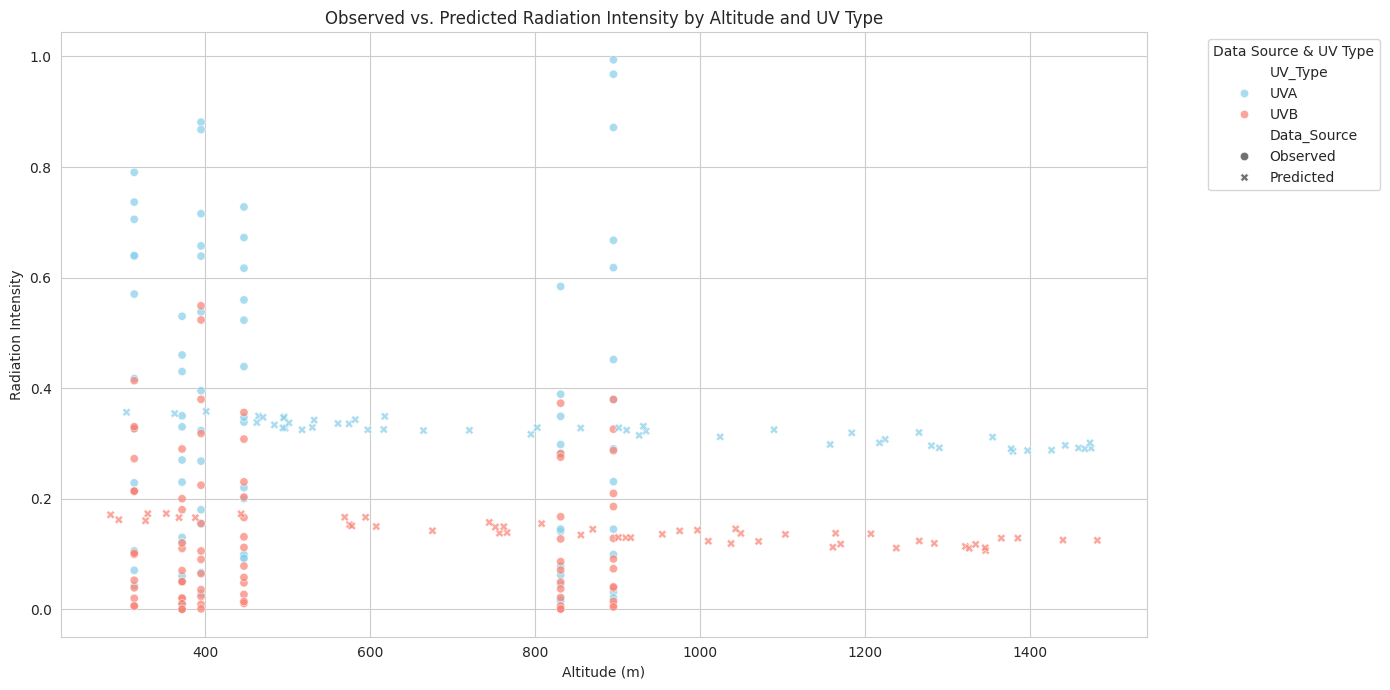

In [35]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_combined_plot, x='Altitude', y='Radiation_Intensity', hue='UV_Type', style='Data_Source', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Observed vs. Predicted Radiation Intensity by Altitude and UV Type')
plt.xlabel('Altitude (m)')
plt.ylabel('Radiation Intensity')
plt.legend(title='Data Source & UV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Reasoning**:
To compare the observed and predicted radiation intensity against time, I will create a single scatter plot using the `df_combined_plot` DataFrame, differentiating between 'Observed' and 'Predicted' data sources, and 'UVA' and 'UVB' types using color and style as specified in instruction 5 of the subtask.



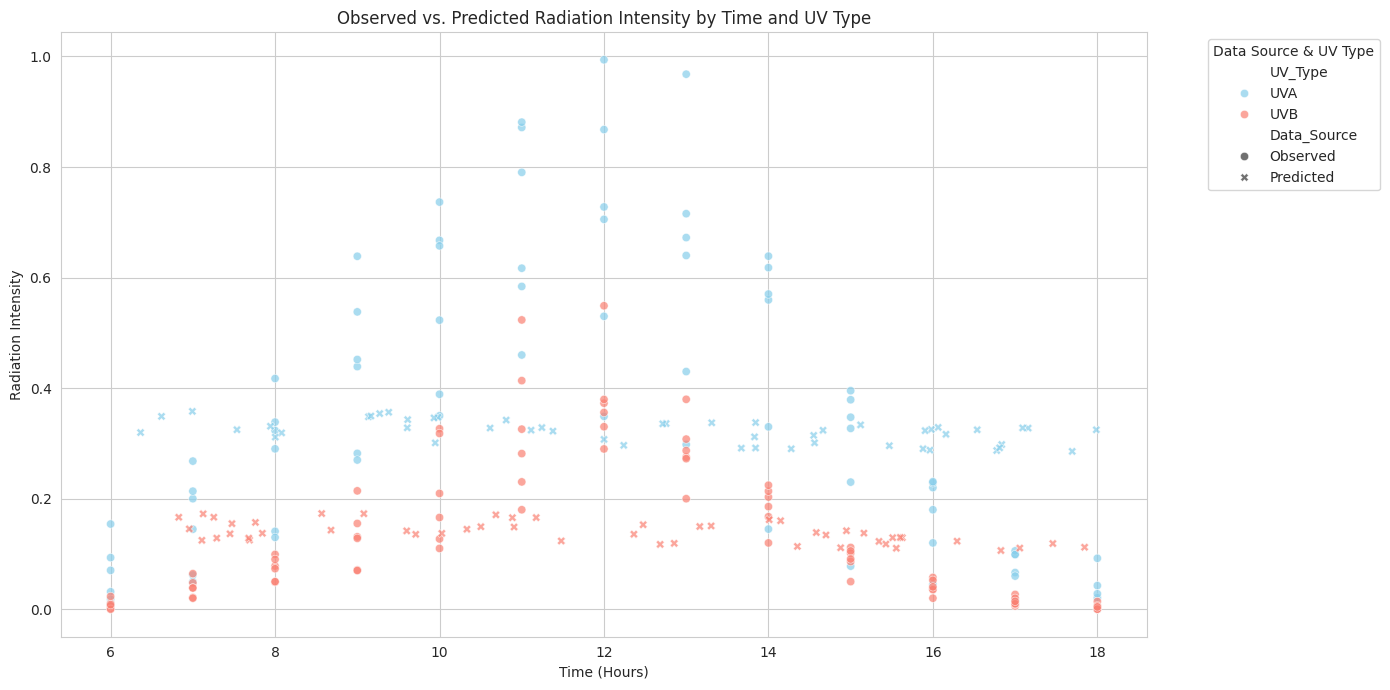

In [36]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_combined_plot, x='Time_Numeric', y='Radiation_Intensity', hue='UV_Type', style='Data_Source', palette={'UVA': 'skyblue', 'UVB': 'salmon'}, alpha=0.7)
plt.title('Observed vs. Predicted Radiation Intensity by Time and UV Type')
plt.xlabel('Time (Hours)')
plt.ylabel('Radiation Intensity')
plt.legend(title='Data Source & UV Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
import joblib

# Define the filename for saving the model
model_filename = 'radiation_prediction_model.pkl'

# Save the trained model to a file
joblib.dump(model_augmented, model_filename)

print(f"Trained model saved to {model_filename}")

Trained model saved to radiation_prediction_model.pkl


In [39]:
from google.colab import files

# Define the filename of the saved model
model_filename = 'radiation_prediction_model.pkl'

try:
    files.download(model_filename)
    print(f"Downloading {model_filename}...")
except Exception as e:
    print(f"Error downloading the model: {e}")
    print("Please ensure the file exists and you have executed the cell to save the model.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the Model

You can download the saved model file (`radiation_prediction_model.pkl`) to your local machine by clicking on the file icon (folder icon) in the left sidebar, navigating to the file, right-clicking on it, and selecting 'Download'.

In [46]:
import joblib

# Define the filename for saving the scaler
scaler_filename = 'radiation_scaler.pkl'

# Save the trained scaler to a file
joblib.dump(scaler, scaler_filename)

print(f"Trained scaler saved to {scaler_filename}")

Trained scaler saved to radiation_scaler.pkl


In [47]:
from google.colab import files

# Define the filename of the saved scaler
scaler_filename = 'radiation_scaler.pkl'

try:
    files.download(scaler_filename)
    print(f"Downloading {scaler_filename}...")
except Exception as e:
    print(f"Error downloading the scaler: {e}")
    print("Please ensure the file exists and you have executed the cell to save the scaler.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Download the Scaler Model

You can download the saved scaler file (`radiation_scaler.pkl`) to your local machine by clicking on the file icon (folder icon) in the left sidebar, navigating to the file, right-clicking on it, and selecting 'Download'.

## Final Task

### Subtask:
Provide a comprehensive summary of the analysis, including the model's performance, its ability to predict for unseen scenarios, and insights into radiation intensity variations with altitude and time.


## Summary:

### Q&A
*   **Model's performance:** The trained Linear Regression model exhibited limited performance, with an R-squared (R2) value of 0.2035. The Mean Absolute Error (MAE) was 0.1604, and the Mean Squared Error (MSE) was 0.0381. This indicates that approximately 20.35% of the variance in radiation intensity can be explained by the model, suggesting it has low explanatory power.
*   **Ability to predict for unseen scenarios:** The model can generate predictions for unseen scenarios, including altitudes extending beyond the original dataset (up to 1500m) and various times between 6 AM and 6 PM. However, given its low overall accuracy (R2 = 0.2035), the reliability of these predictions for novel conditions may be limited.
*   **Insights into radiation intensity variations with altitude and time:**
    *   Preliminary exploratory analysis indicated distinct distributions for UV-A and UV-B radiation intensity, with UV-B possibly showing lower overall intensity.
    *   Visualizations of both observed and predicted data show general trends of radiation intensity varying with both altitude and time. However, the model's scatter plots for both observed and predicted data, particularly against altitude and time, suggest that while it captures some directionality, it struggles to accurately predict the precise values, indicating complex relationships that a simple linear model cannot fully capture.

### Data Analysis Key Findings
*   UV-A and UV-B radiation data for six locations were successfully loaded from Excel files, combined, and preprocessed into a unified dataset.
*   Approximate altitude values for the six locations were incorporated (e.g., Dehradun ~447m, Haridwar ~314m, Rudraprayag ~895m).
*   The dataset was filtered to include radiation observations strictly between 6 AM and 6 PM, and subsequent quality checks confirmed no missing values or duplicate rows.
*   Radiation intensity in the observed data ranged from 0.0 to 0.994, with a mean of 0.24. Altitude ranged from 314m to 895m, and Time (numeric) ranged from 6.0 to 18.0 hours.
*   A Linear Regression model, initially trained on the real data, was used to generate 500 synthetic data points, augmenting the original dataset to a total of 656 entries. These synthetic points included added Gaussian noise for realism.
*   The final Linear Regression model, trained on the augmented dataset, demonstrated limited predictive performance with an R-squared of 0.2035, a Mean Absolute Error of 0.1604, and a Mean Squared Error of 0.0381.
*   The model successfully generated predictions for 100 hypothetical unseen scenarios, including altitudes up to 1500m, showing its applicability to broader conditions, though with noted accuracy limitations.

### Insights or Next Steps
*   The low R-squared value (\$0.2035\$) for the current linear model suggests that the relationships between radiation intensity, altitude, and time are likely non-linear or involve complex interactions.
*   Explore more advanced regression techniques such as polynomial regression, tree-based models (e.g., Random Forest, Gradient Boosting), or neural networks to better capture the underlying complex patterns and improve prediction accuracy.
